# Importando as libs

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.dates import DateFormatter
from datetime import date

In [14]:
# Configuração do seaborn
plt.rcParams['figure.figsize'] = [17, 9]
dic = {
        'grid.color': '#bdbdbd',
       'axes.grid': True,
       'axes.labelcolor': '#D3D3D3',
       'text.color': '#4d4d4d', # Cor do titulo
        'xtick.color': '#bdbdbd', # Cor dos ticks do eixo x
        'ytick.color': '#bdbdbd', # Cor dos ticks do eixo y
        'axes.edgecolor': 'bdbdbd',
        'font.sans-serif': ['Arial'], # Fonte
        'font.family': ['Arial'], # Fonte
        'grid.color': '#ffffffff',
        'grid.linestyle': '-'
        } 
sns.set_style(style="whitegrid",rc = dic)

# Carregando os dados

In [9]:
df1 = pd.read_csv('./dolar_ibov.csv', parse_dates=['data'])

### Fazendo a analise descritiva de toda a base

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5199 entries, 0 to 5198
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              5199 non-null   datetime64[ns]
 1   fechamento_ibov   5199 non-null   float64       
 2   fechamento_dolar  5199 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 122.0 KB


## Analisando o periodo eleitoral de 2002, 2006, 2010 e 2014

In [11]:
# Filtrando os dados de 2002-10-01 ate 2002-12-31
df_gov1 = df1[(df1['data'] >= '2002-08-01') & (df1['data'] <= '2002-12-31')]
# Filtrando os dados de 2006-10-01 ate 2006-12-31
df_gov2 = df1[(df1['data'] >= '2006-08-01') & (df1['data'] <= '2006-12-31')]
# Filtrando os dados de 2010-10-01 ate 2010-12-31
df_gov3 = df1[(df1['data'] >= '2010-08-01') & (df1['data'] <= '2010-12-31')]
# Filtrando os dados de 2014-10-01 ate 2014-12-31
df_gov4 = df1[(df1['data'] >= '2014-08-01') & (df1['data'] <= '2014-12-31')]

### Plotando o grafico temporal

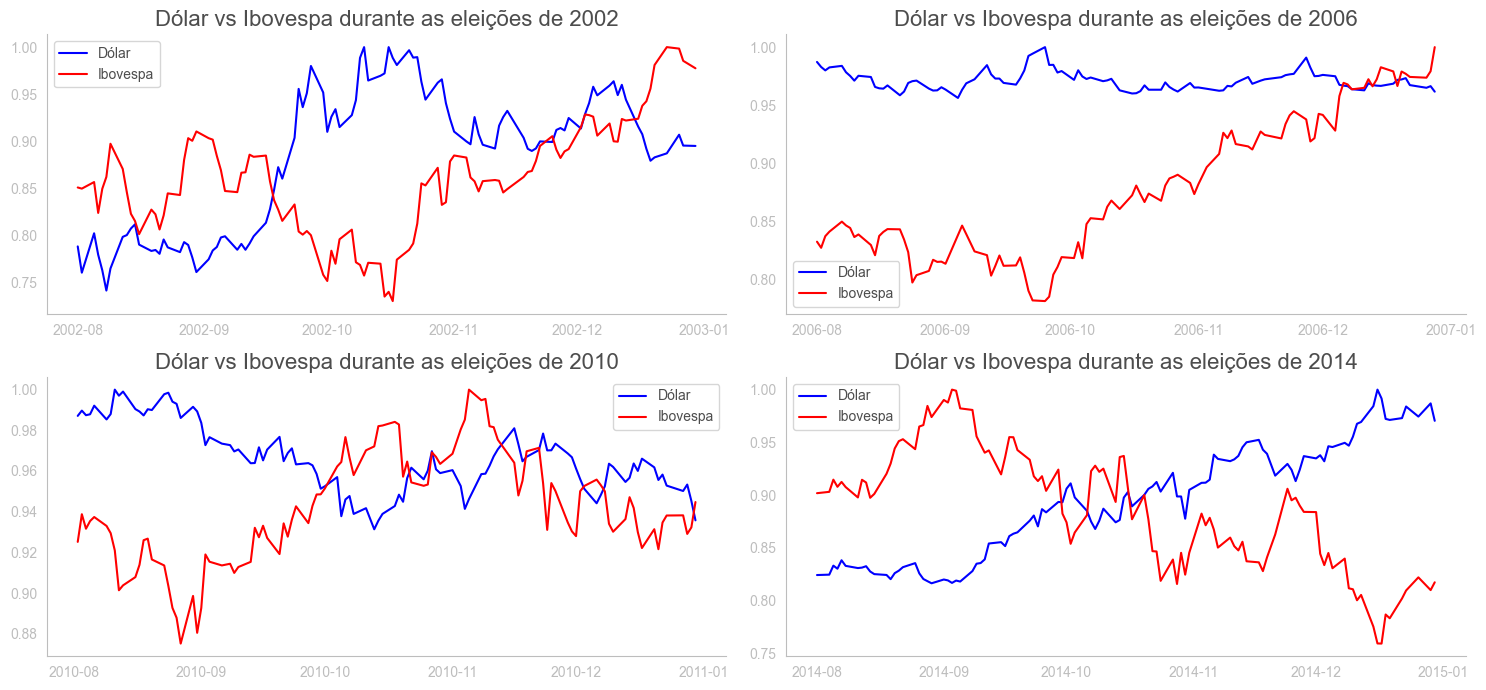

In [16]:
# Criando o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_dolar'] / df_gov1['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_ibov'] / df_gov1['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante as eleições de 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_dolar'] / df_gov2['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_ibov'] / df_gov2['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante as eleições de 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_dolar'] / df_gov3['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_ibov'] / df_gov3['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante as eleições de 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_dolar'] / df_gov4['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_ibov'] / df_gov4['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante as eleições de 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
sns.despine()
plt.show()

In [148]:
# unindo os dataframes
df_gov1 = df_gov1[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov1.columns = ['data', 'fechamento_ibov_2002', 'fechamento_dolar_2002']

df_gov2 = df_gov2[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov2.columns = ['data', 'fechamento_ibov_2006', 'fechamento_dolar_2006']

df_gov3 = df_gov3[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov3.columns = ['data', 'fechamento_ibov_2010', 'fechamento_dolar_2010']

df_gov4 = df_gov4[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov4.columns = ['data', 'fechamento_ibov_2014', 'fechamento_dolar_2014']

df_govs = pd.concat([df_gov1, df_gov2, df_gov3, df_gov4])

### Plotando o grafico de correlação

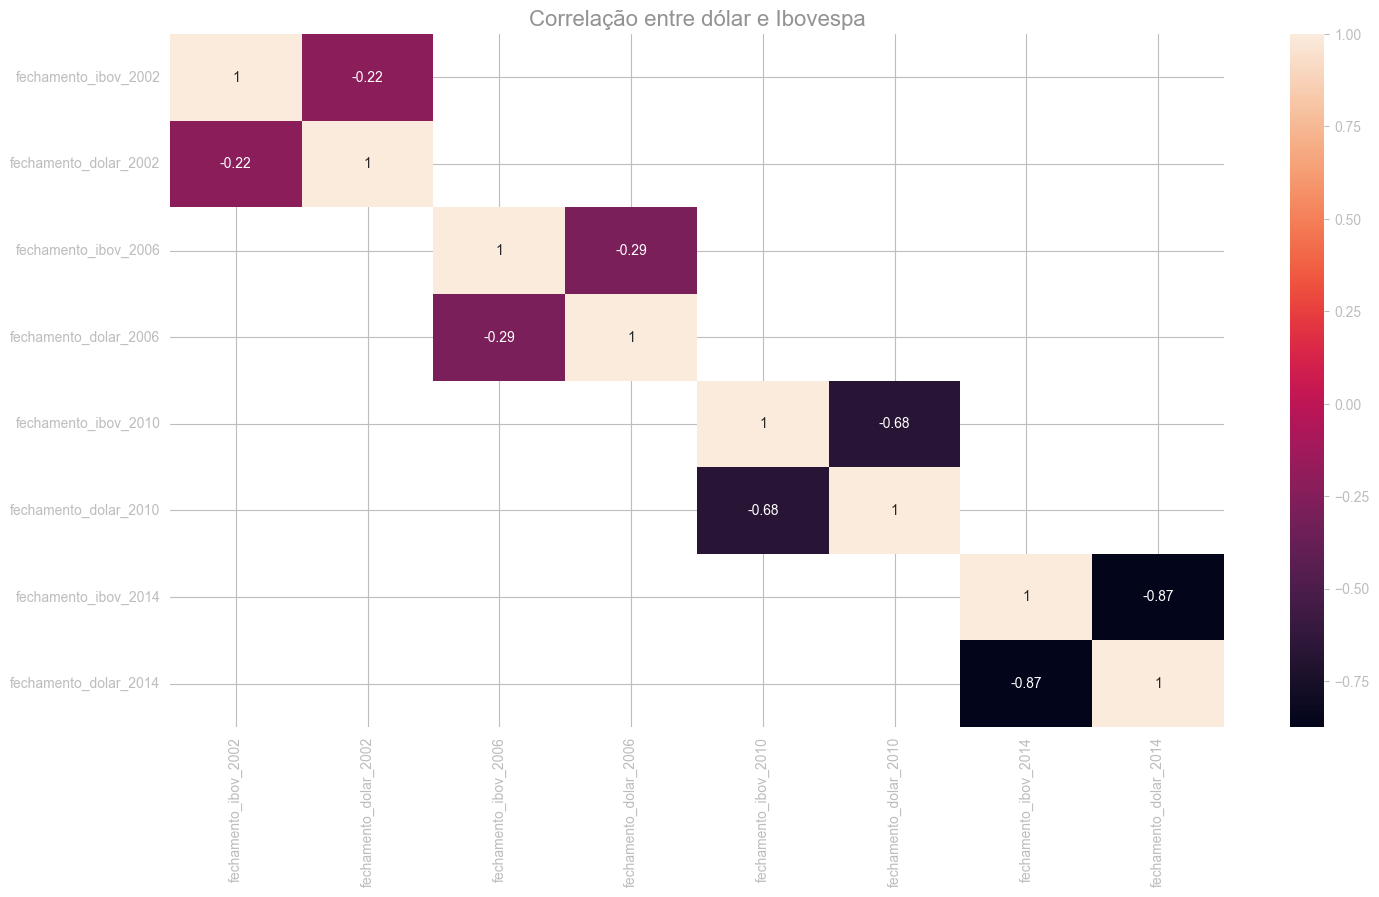

In [102]:
sns.heatmap(df_govs[['fechamento_ibov_2002', 'fechamento_dolar_2002', 'fechamento_ibov_2006', 'fechamento_dolar_2006', 'fechamento_ibov_2010', 'fechamento_dolar_2010', 'fechamento_ibov_2014', 'fechamento_dolar_2014']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa', fontsize=16)
plt.show()

### Plotando o grafico de dispersao

#### Comparando a dispersão entre as eleições de 2002 e 2014

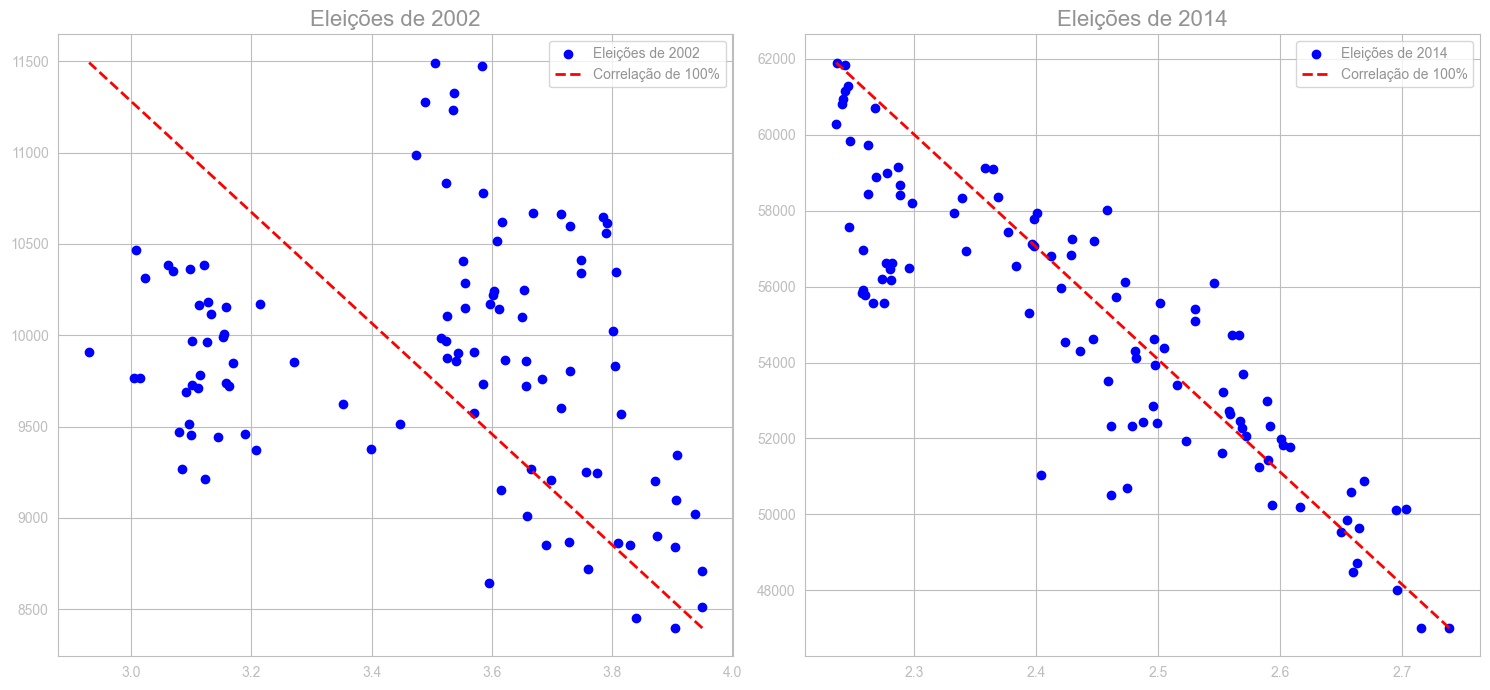

In [157]:
plt.figure(figsize=(15, 7))

# Eleições 2002
plt.subplot(1, 2, 1)
x = [df_govs.fechamento_dolar_2002.max(), df_govs.fechamento_dolar_2002.min()]
y = [df_govs.fechamento_ibov_2002.min(), df_govs.fechamento_ibov_2002.max()]
plt.scatter(x=df_govs['fechamento_dolar_2002'], y=df_govs['fechamento_ibov_2002'], color='blue', label='Eleições de 2002')
plt.plot(x, y, linestyle='--', color='red', linewidth=2, label='Correlação de 100%')
plt.title('Eleições de 2002', fontsize=16)
plt.legend()
# Eleições 2014
plt.subplot(1, 2, 2)
x = [df_govs.fechamento_dolar_2014.max(), df_govs.fechamento_dolar_2014.min()]
y = [df_govs.fechamento_ibov_2014.min(), df_govs.fechamento_ibov_2014.max()]
plt.scatter(x=df_govs['fechamento_dolar_2014'], y=df_govs['fechamento_ibov_2014'], color='blue', label='Eleições de 2014')
plt.plot(x, y, linestyle='--', color='red', linewidth=2, label='Correlação de 100%')
plt.title('Eleições de 2014', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

### Analisando os 3 primeiros meses do governo eleito

In [123]:
# Filtrando os dados de 2003-01-01 ate 2002-03-31
df_gov1 = df1[(df1['data'] >= '2003-01-01') & (df1['data'] <= '2003-03-31')]
# Filtrando os dados de 2006-01-01 ate 2006-03-31
df_gov2 = df1[(df1['data'] >= '2006-01-01') & (df1['data'] <= '2007-03-31')]
# Filtrando os dados de 2010-01-01 ate 2010-03-31
df_gov3 = df1[(df1['data'] >= '2010-01-01') & (df1['data'] <= '2011-03-31')]
# Filtrando os dados de 2014-01-01 ate 2014-03-31
df_gov4 = df1[(df1['data'] >= '2014-01-01') & (df1['data'] <= '2015-03-31')]

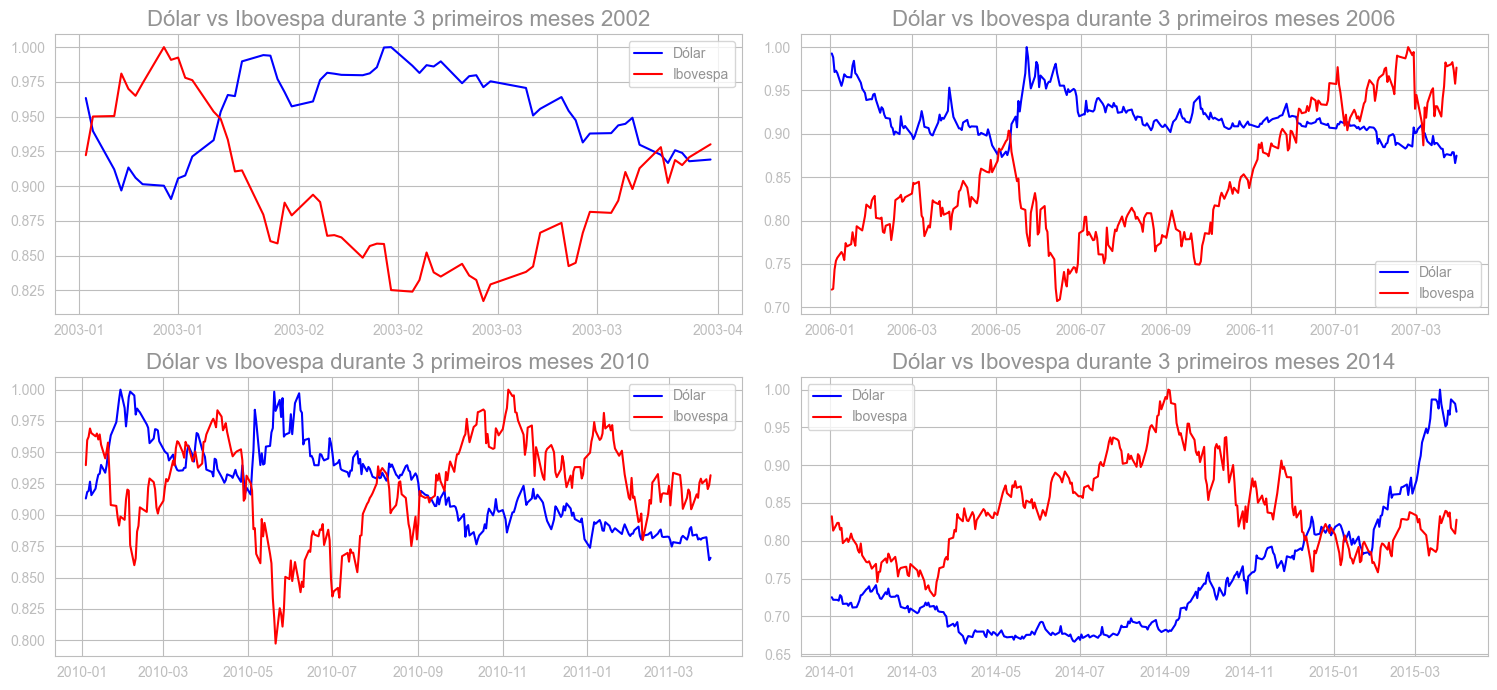

In [124]:
# Criando o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_dolar'] / df_gov1['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_gov1['data'], (df_gov1['fechamento_ibov'] / df_gov1['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante 3 primeiros meses 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_dolar'] / df_gov2['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_gov2['data'], (df_gov2['fechamento_ibov'] / df_gov2['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante 3 primeiros meses 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_dolar'] / df_gov3['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_gov3['data'], (df_gov3['fechamento_ibov'] / df_gov3['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante 3 primeiros meses 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_dolar'] / df_gov4['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_gov4['data'], (df_gov4['fechamento_ibov'] / df_gov4['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante 3 primeiros meses 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [106]:
# unindo os dataframes
df_gov1 = df_gov1[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov1.columns = ['data', 'fechamento_ibov_2002', 'fechamento_dolar_2002']

df_gov2 = df_gov2[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov2.columns = ['data', 'fechamento_ibov_2006', 'fechamento_dolar_2006']

df_gov3 = df_gov3[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov3.columns = ['data', 'fechamento_ibov_2010', 'fechamento_dolar_2010']

df_gov4 = df_gov4[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_gov4.columns = ['data', 'fechamento_ibov_2014', 'fechamento_dolar_2014']

df_govs = pd.concat([df_gov1, df_gov2, df_gov3, df_gov4])

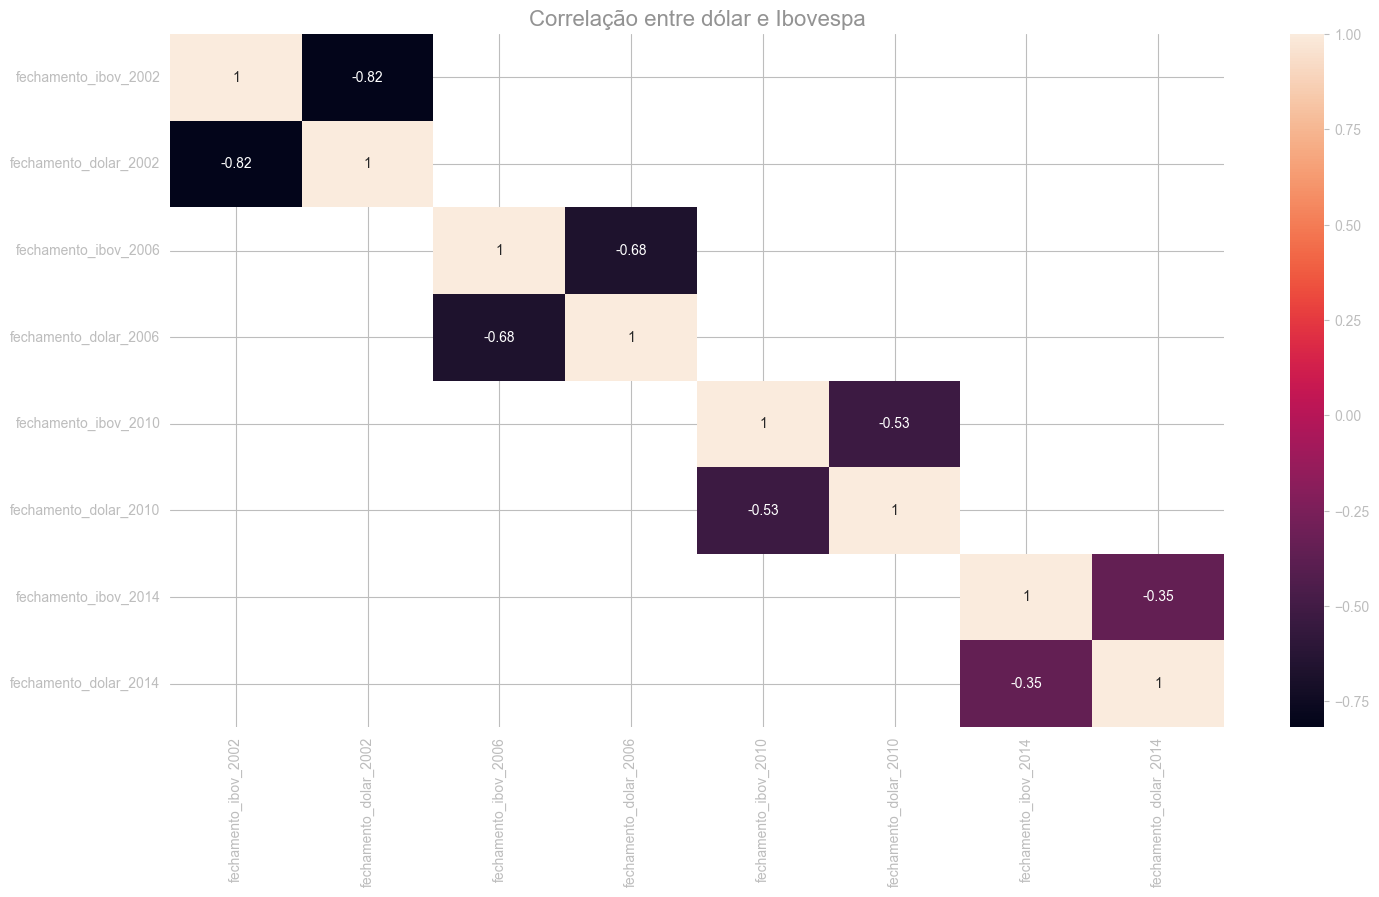

In [107]:
sns.heatmap(df_govs[['fechamento_ibov_2002', 'fechamento_dolar_2002', 'fechamento_ibov_2006', 'fechamento_dolar_2006', 'fechamento_ibov_2010', 'fechamento_dolar_2010', 'fechamento_ibov_2014', 'fechamento_dolar_2014']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa', fontsize=16)
plt.show()

### Analisando os dados do ano seguinte às eleições

In [108]:
# Filtrando os dados de 2002-10-01 ate 2003-01-31
df_2003 = df1[(df1['data'] >= '2003-10-01') & (df1['data'] <= '2004-01-31')]
# Filtrando os dados de 2007-10-01 ate 2008-01-31
df_2007 = df1[(df1['data'] >= '2007-10-01') & (df1['data'] <= '2008-01-31')]
# Filtrando os dados de 2002-10-01 ate 2003-01-31
df_2011 = df1[(df1['data'] >= '2011-10-01') & (df1['data'] <= '2012-01-31')]
# Filtrando os dados de 2015-10-01 ate 2016-01-31
df_2015 = df1[(df1['data'] >= '2015-10-01') & (df1['data'] <= '2016-01-31')]

### Plotando o grafico temporal

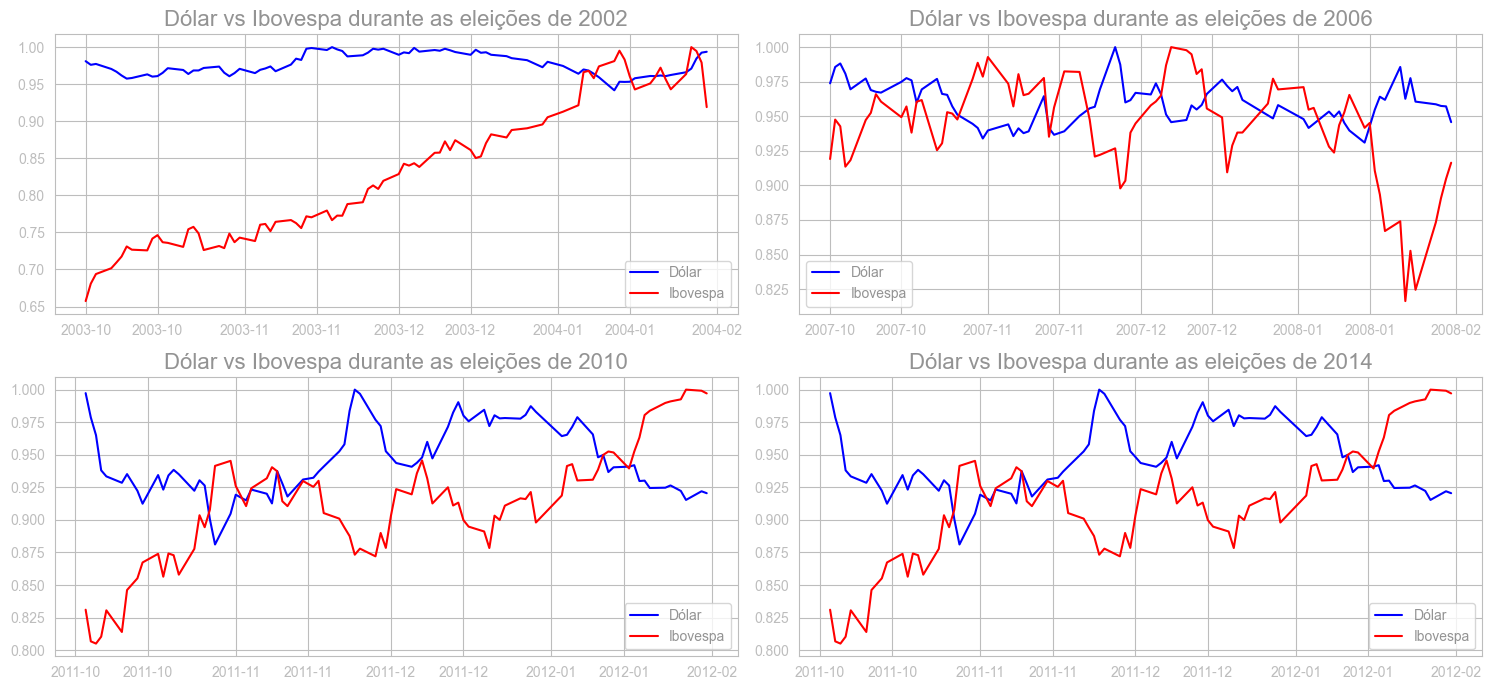

In [109]:
# Crie o gráfico usando o Matplotlib
fig, axs = plt.subplots(2, 2, figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

axs[0,0].plot(df_2003['data'], (df_2003['fechamento_dolar'] / df_2003['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,0].plot(df_2003['data'], (df_2003['fechamento_ibov'] / df_2003['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,0].xaxis.set_major_formatter(date_format)
axs[0,0].set_title('Dólar vs Ibovespa durante as eleições de 2002', fontsize=16)
axs[0,0].legend()

axs[0,1].plot(df_2007['data'], (df_2007['fechamento_dolar'] / df_2007['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[0,1].plot(df_2007['data'], (df_2007['fechamento_ibov'] / df_2007['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[0,1].xaxis.set_major_formatter(date_format)
axs[0,1].set_title('Dólar vs Ibovespa durante as eleições de 2006', fontsize=16)
axs[0,1].legend()

axs[1,0].plot(df_2011['data'], (df_2011['fechamento_dolar'] / df_2011['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,0].plot(df_2011['data'], (df_2011['fechamento_ibov'] / df_2011['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,0].xaxis.set_major_formatter(date_format)
axs[1,0].set_title('Dólar vs Ibovespa durante as eleições de 2010', fontsize=16)
axs[1,0].legend()

axs[1,1].plot(df_2011['data'], (df_2011['fechamento_dolar'] / df_2011['fechamento_dolar'].max()), label='Dólar', color='blue')
axs[1,1].plot(df_2011['data'], (df_2011['fechamento_ibov'] / df_2011['fechamento_ibov'].max()), label='Ibovespa', color='red')
axs[1,1].xaxis.set_major_formatter(date_format)
axs[1,1].set_title('Dólar vs Ibovespa durante as eleições de 2014', fontsize=16)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [110]:
# unindo os dataframes
df_2003 = df_2003[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2003.columns = ['data', 'fechamento_ibov_2003', 'fechamento_dolar_2003']

df_2007 = df_2007[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2007.columns = ['data', 'fechamento_ibov_2007', 'fechamento_dolar_2007']

df_2011 = df_2011[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2011.columns = ['data', 'fechamento_ibov_2011', 'fechamento_dolar_2011']

df_2015 = df_2015[['data', 'fechamento_ibov', 'fechamento_dolar']]
df_2015.columns = ['data', 'fechamento_ibov_2015', 'fechamento_dolar_2015']

df_pos_govs = pd.concat([df_2003, df_2007, df_2011, df_2015])

### Plotando o grafico de correlação

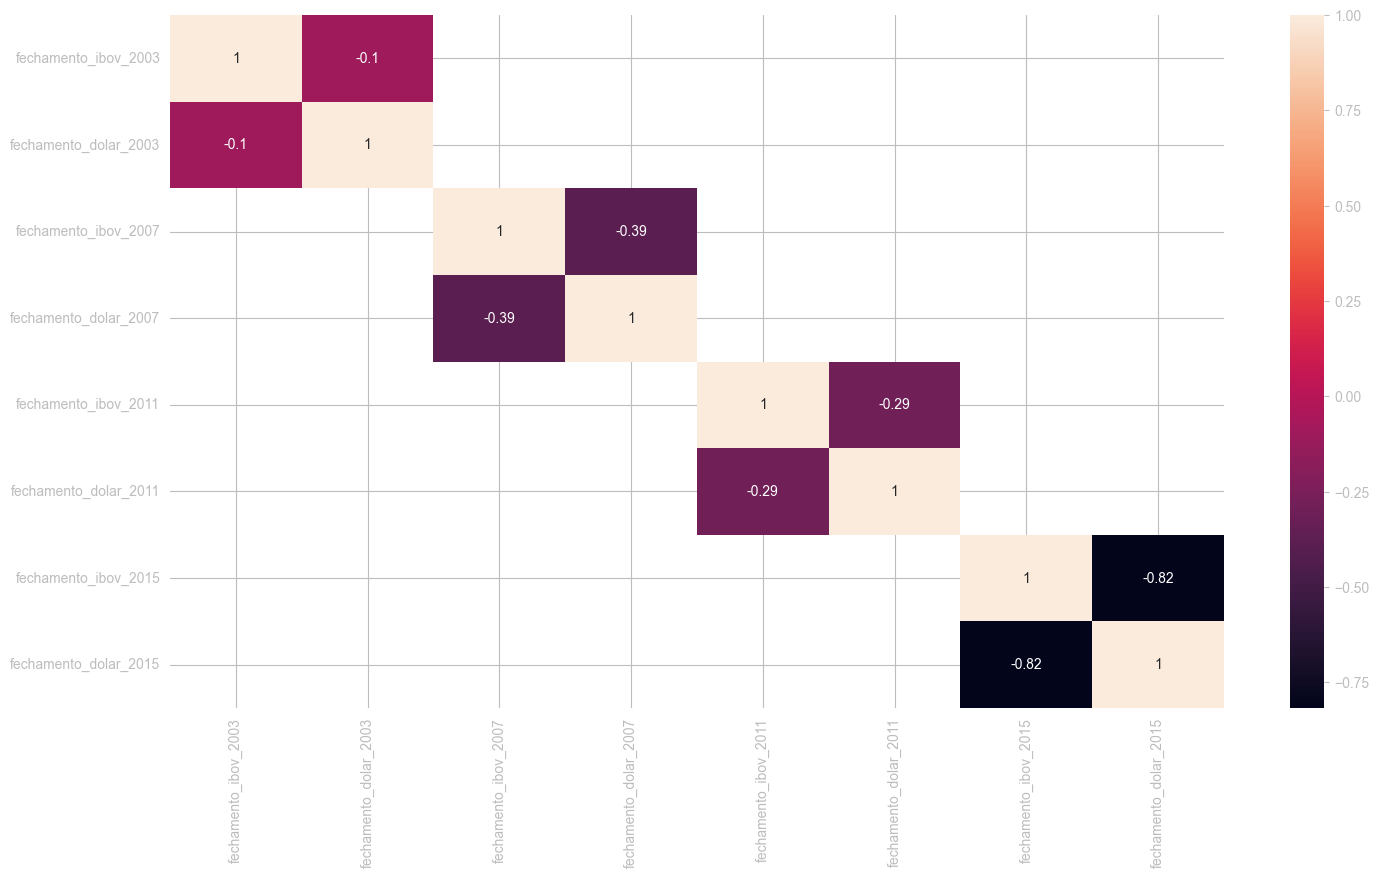

In [111]:
sns.heatmap(df_pos_govs[['fechamento_ibov_2003', 'fechamento_dolar_2003', 'fechamento_ibov_2007', 'fechamento_dolar_2007', 'fechamento_ibov_2011', 'fechamento_dolar_2011', 'fechamento_ibov_2015', 'fechamento_dolar_2015']].corr(), annot=True)
plt.show()

### Plotando o grafico de dispersao

## Analisando os dados da crise de 2008 nos EUA

In [159]:
# Filtrando os dados de 2007-12-01 ate 2009-06-30
df_crise = df1[(df1['data'] >= '2007-12-01') & (df1['data'] <= '2009-06-30')]

In [160]:
df_crise.describe()

,data,fechamento_ibov,fechamento_dolar
count,389,389.000000,389.000000
mean,2008-09-16 13:30:41.645244160,52319.383033,1.943938
min,2007-12-03 00:00:00,29438.000000,1.559600
25%,2008-04-29 00:00:00,40512.000000,1.678700
50%,2008-09-16 00:00:00,53202.000000,1.825300
75%,2009-02-05 00:00:00,62280.000000,2.245000
max,2009-06-30 00:00:00,73508.000000,2.512000
std,NaN,11337.679650,0.287899


In [171]:
# Valor maximo e minimo do dolar durante a crise
df_crise[(df_crise.fechamento_dolar == df_crise.fechamento_dolar.max()) | (df_crise.fechamento_dolar == df_crise.fechamento_dolar.min())]

,data,fechamento_ibov,fechamento_dolar
1633,2008-08-04,57619.0,1.5596
1722,2008-12-08,35347.0,2.5120


In [172]:
# Valor maximo e minimo do Ibovespa durante a crise
df_crise[(df_crise.fechamento_ibov == df_crise.fechamento_ibov.max()) | (df_crise.fechamento_ibov == df_crise.fechamento_ibov.min())]

,data,fechamento_ibov,fechamento_dolar
1582,2008-05-21,73508.0,1.6573
1694,2008-10-28,29438.0,2.1609


### Plotando o grafico temporal

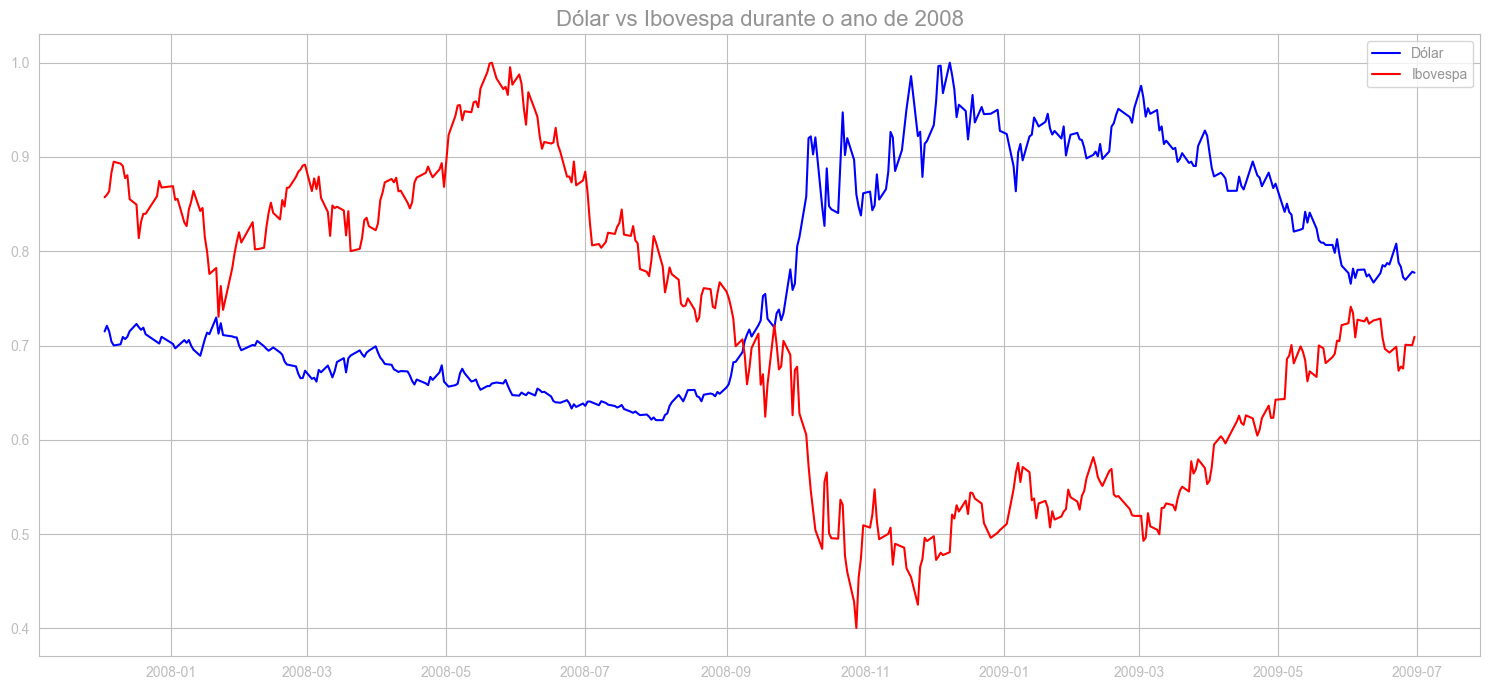

In [116]:
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

plt.plot(df_crise['data'], (df_crise['fechamento_dolar'] / df_crise['fechamento_dolar'].max()), label='Dólar', color='blue')
plt.plot(df_crise['data'], (df_crise['fechamento_ibov'] / df_crise['fechamento_ibov'].max()), label='Ibovespa', color='red')
plt.title('Dólar vs Ibovespa durante o ano de 2008', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

### Plotando o grafico de correlação

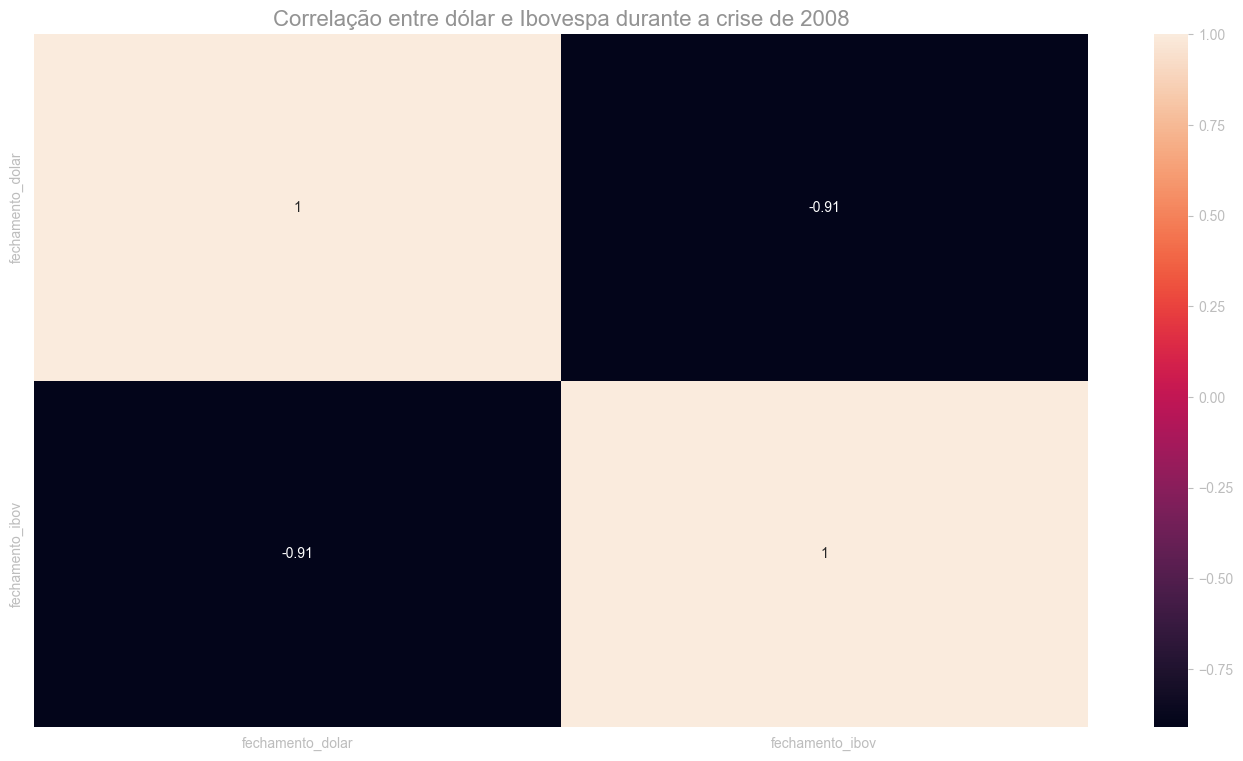

In [117]:
sns.heatmap(df_crise[['fechamento_dolar', 'fechamento_ibov']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa durante a crise de 2008', fontsize=16)
plt.show()

In [130]:
df_crise.corr()

,data,fechamento_ibov,fechamento_dolar
data,1.000000,-0.700025,0.693093
fechamento_ibov,-0.700025,1.000000,-0.909911
fechamento_dolar,0.693093,-0.909911,1.000000


### Plotando o grafico de dispersao

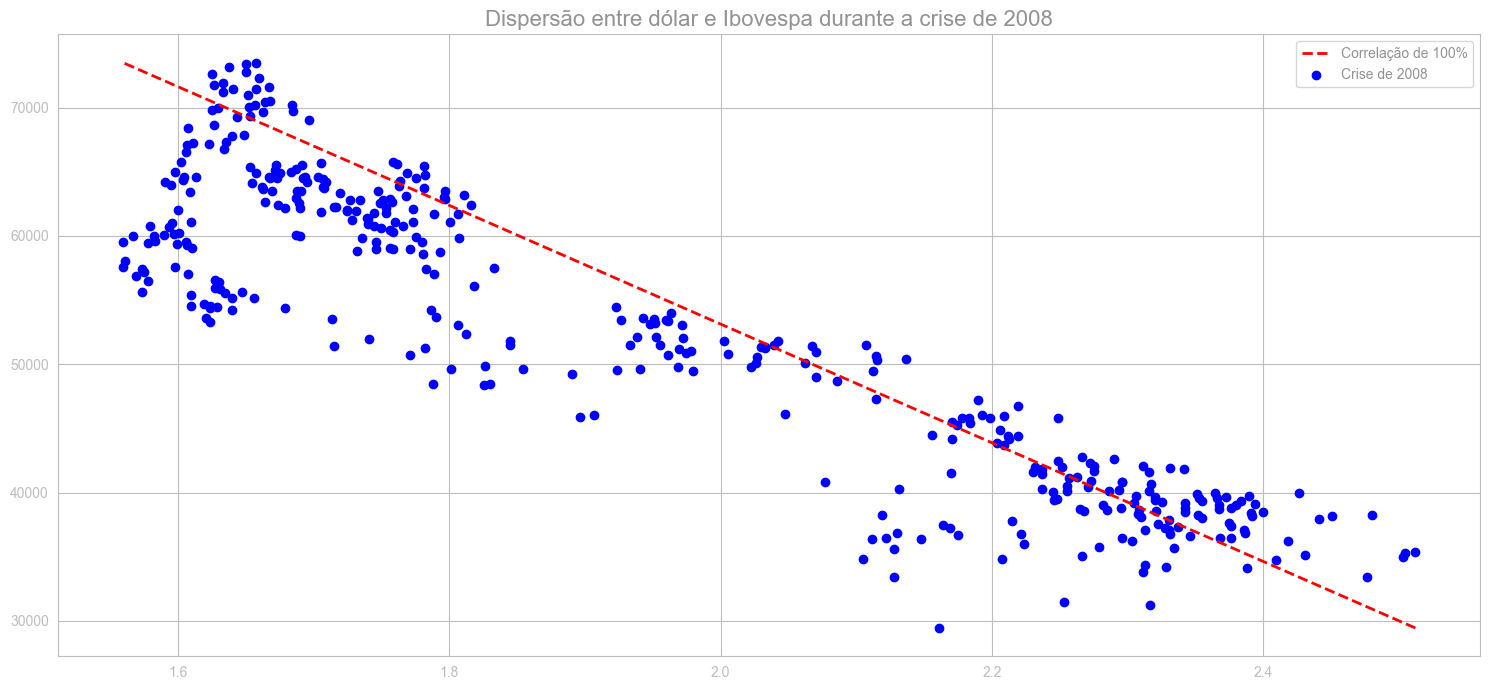

In [156]:
x = [df_crise.fechamento_dolar.max(), df_crise.fechamento_dolar.min()]  # Coordenadas x dos pontos inicial e final da linha
y = [df_crise.fechamento_ibov.min(), df_crise.fechamento_ibov.max()]
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
plt.plot(x, y, linestyle='--', color='red', linewidth=2, label='Correlação de 100%')
plt.scatter(x=df_crise['fechamento_dolar'],y=df_crise['fechamento_ibov'], color='blue', label='Crise de 2008')
plt.title('Dispersão entre dólar e Ibovespa durante a crise de 2008', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

## Analisando os dados durante Impeachment do segundo governo Dilma

In [193]:
# Filtrando os dados de 2007-12-01 ate 2009-06-30
df_gov = df1[(df1['data'] >= '2015-01-01') & (df1['data'] <= '2015-07-31')]

In [174]:
df_gov.describe()

,data,fechamento_ibov,fechamento_dolar
count,186,186.000000,186.000000
mean,2016-04-19 22:27:05.806451712,49175.693548,3.604299
min,2015-12-02 00:00:00,37501.000000,3.127100
25%,2016-02-15 06:00:00,44520.000000,3.345000
50%,2016-04-21 00:00:00,50031.500000,3.569800
75%,2016-06-27 18:00:00,53130.750000,3.879175
max,2016-08-31 00:00:00,59324.000000,4.157500
std,NaN,5954.505481,0.288558


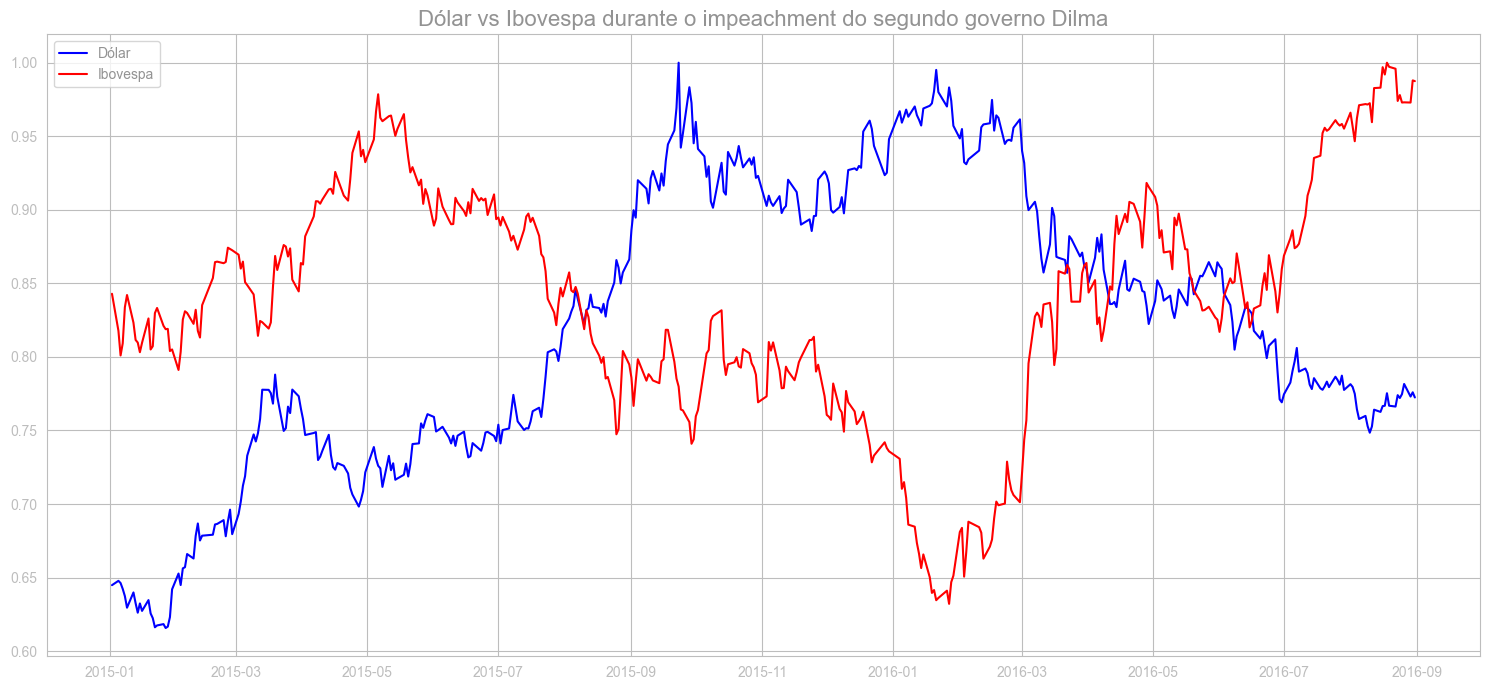

In [191]:
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

plt.plot(df_gov['data'], (df_gov['fechamento_dolar'] / df_gov['fechamento_dolar'].max()), label='Dólar', color='blue')
plt.plot(df_gov['data'], (df_gov['fechamento_ibov'] / df_gov['fechamento_ibov'].max()), label='Ibovespa', color='red')
plt.title('Dólar vs Ibovespa durante o impeachment do segundo governo Dilma', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

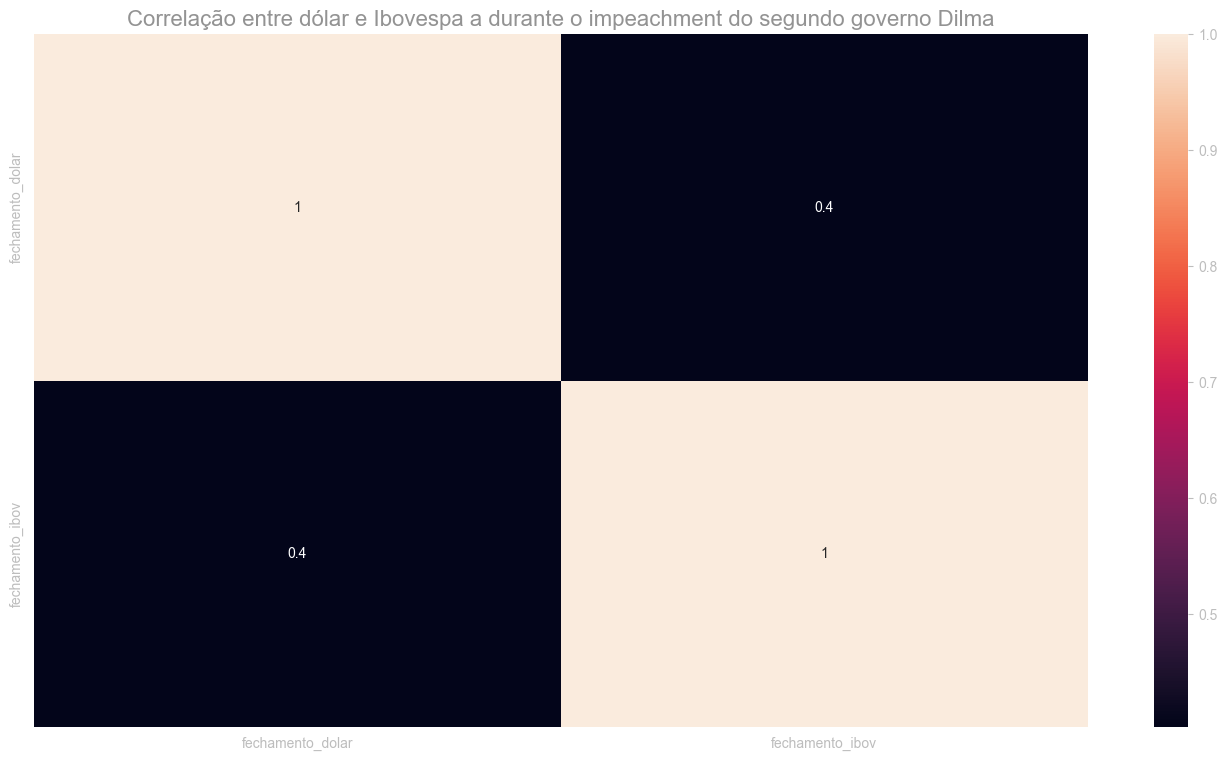

In [194]:
sns.heatmap(df_gov[['fechamento_dolar', 'fechamento_ibov']].corr(), annot=True)
plt.title('Correlação entre dólar e Ibovespa a durante o impeachment do segundo governo Dilma', fontsize=16)
plt.show()

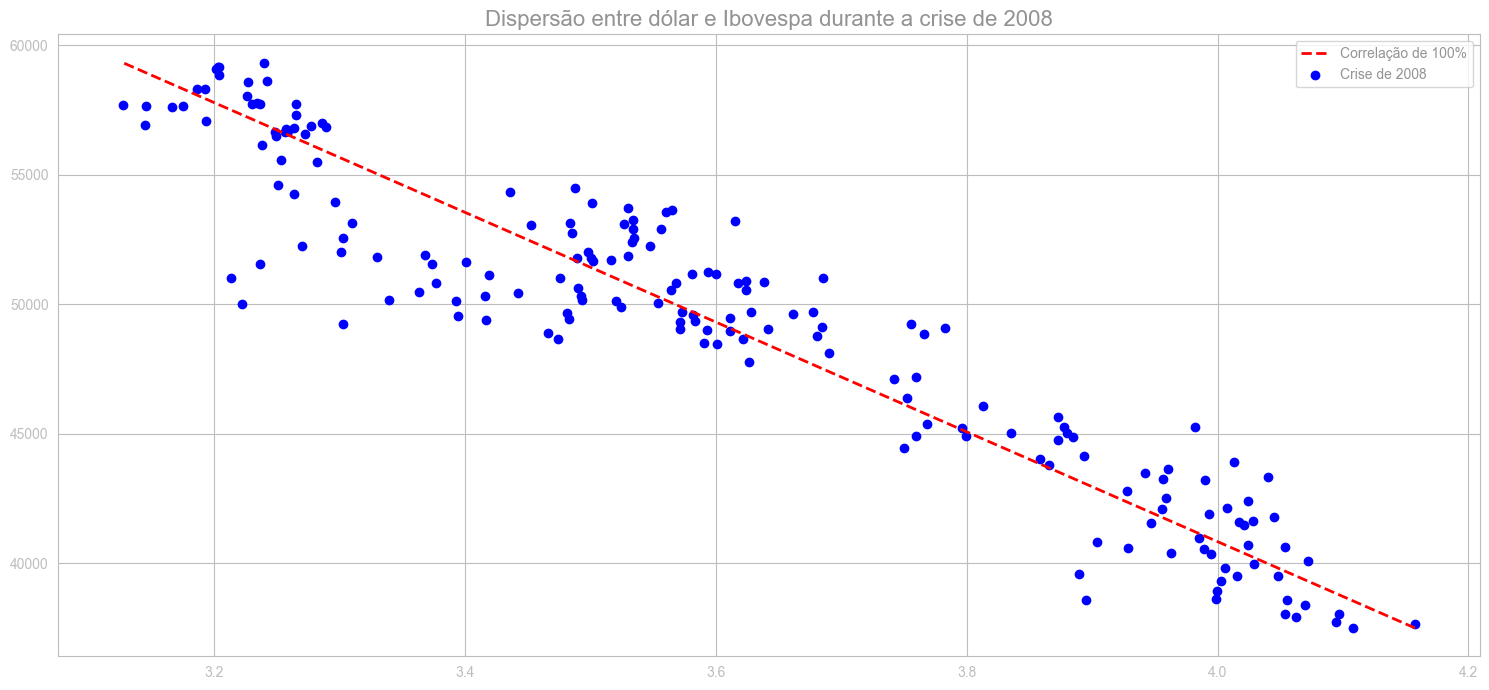

In [180]:
x = [df_gov.fechamento_dolar.max(), df_gov.fechamento_dolar.min()]  # Coordenadas x dos pontos inicial e final da linha
y = [df_gov.fechamento_ibov.min(), df_gov.fechamento_ibov.max()]
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
plt.plot(x, y, linestyle='--', color='red', linewidth=2, label='Correlação de 100%')
plt.scatter(x=df_gov['fechamento_dolar'],y=df_gov['fechamento_ibov'], color='blue', label='Crise de 2008')
plt.title('Dispersão entre dólar e Ibovespa durante a crise de 2008', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

## Analisando os dados durante todo o periodo

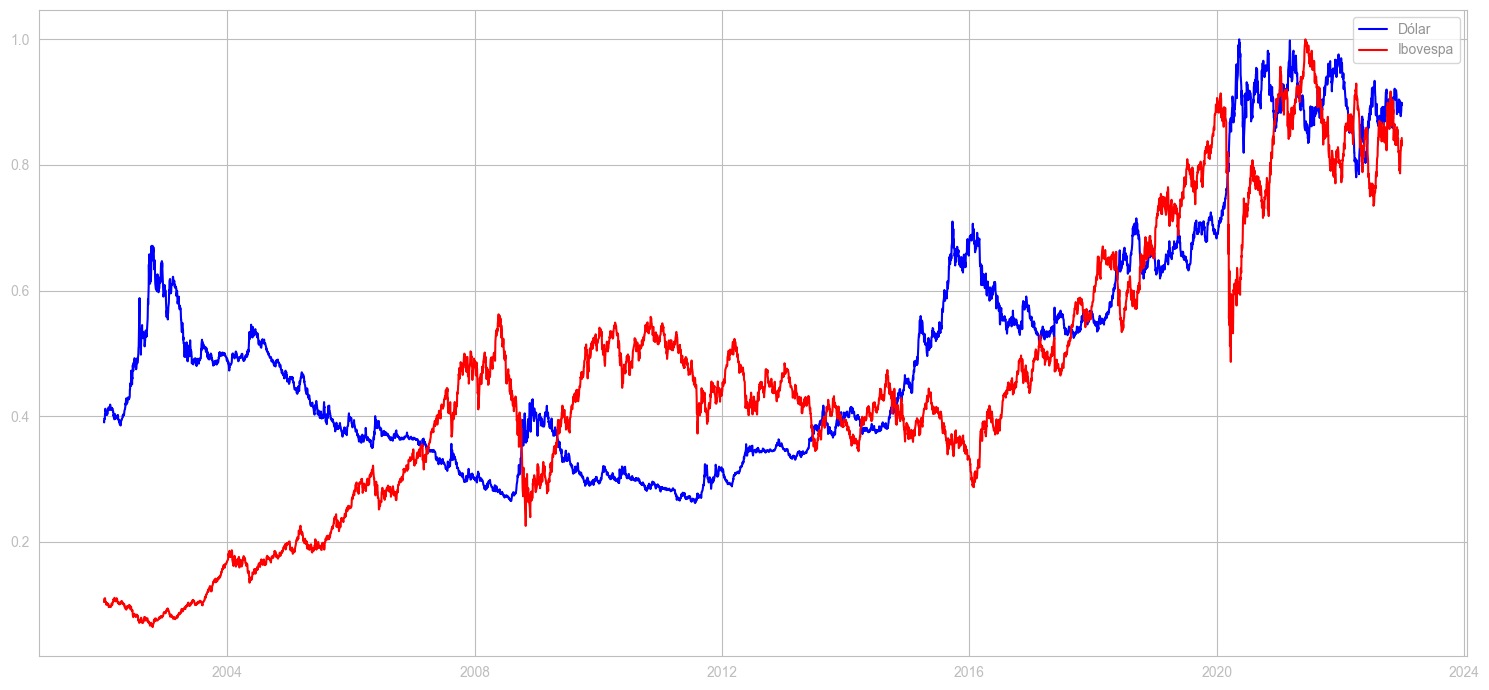

In [196]:
# Crie o gráfico usando o Matplotlib
plt.figure(figsize=(15, 7))
date_format = DateFormatter("%Y-%m")

plt.plot(df1['data'], (df1['fechamento_dolar'] / df1['fechamento_dolar'].max()), label='Dólar', color='blue')
plt.plot(df1['data'], (df1['fechamento_ibov'] / df1['fechamento_ibov'].max()), label='Ibovespa', color='red')
# plt.title('Dólar vs Ibovespa durante o impeachment do segundo governo Dilma', fontsize=16)
plt.legend()

plt.tight_layout()
plt.show()

# Regressão Simples

In [42]:
import statsmodels.api as sm

# Crie um DataFrame com suas variáveis independentes (dólar) e dependentes (Ibovespa)


# Adicione uma constante (intercepto) ao modelo
df1 = sm.add_constant(df1)

# Crie o modelo de regressão
model = sm.OLS(df1['fechamento_ibov'], df1[['const', 'fechamento_dolar']])

# Ajuste o modelo aos dados
results = model.fit()

# Exiba os resultados da regressão
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:        fechamento_ibov   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     2716.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:51:25   Log-Likelihood:                -59762.
No. Observations:                5199   AIC:                         1.195e+05
Df Residuals:                    5197   BIC:                         1.195e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.512e+04    911.017  

In [44]:
results.params

const               15120.070178
fechamento_dolar    14852.633508
dtype: float64

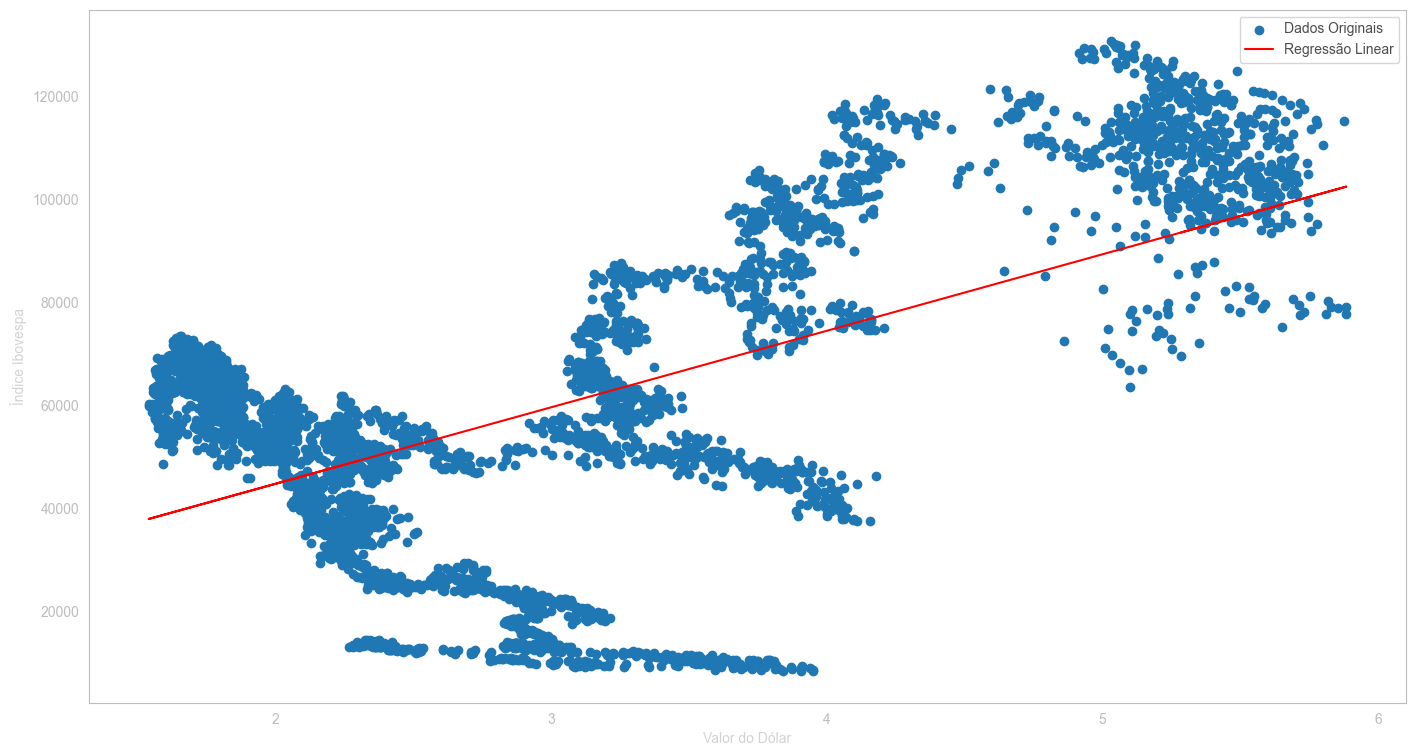

In [34]:
plt.scatter(df1['fechamento_dolar'], df1['fechamento_ibov'], label='Dados Originais')
plt.plot(df1['fechamento_dolar'], results.predict(), label='Regressão Linear', color='red')

plt.xlabel('Valor do Dólar')
plt.ylabel('Índice Ibovespa')
plt.legend()
plt.show()

# Regressão simples 2

In [84]:
df_reg = (
    df1
    .assign(
        ano = df1['data'].dt.year,
    )
    .query("ano%4 == 0")
)

In [85]:
import statsmodels.formula.api as smf

# Crie o modelo de regressão
model2 = smf.ols(formula = 'fechamento_ibov ~ fechamento_dolar + C(ano)', data=df_reg)

# Ajuste o modelo aos dados
results2 = model2.fit()

# Exiba os resultados da regressão
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:        fechamento_ibov   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     3720.
Date:                Tue, 31 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:57:35   Log-Likelihood:                -12629.
No. Observations:                1239   AIC:                         2.527e+04
Df Residuals:                    1233   BIC:                         2.530e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8.462e+04   1941.598  

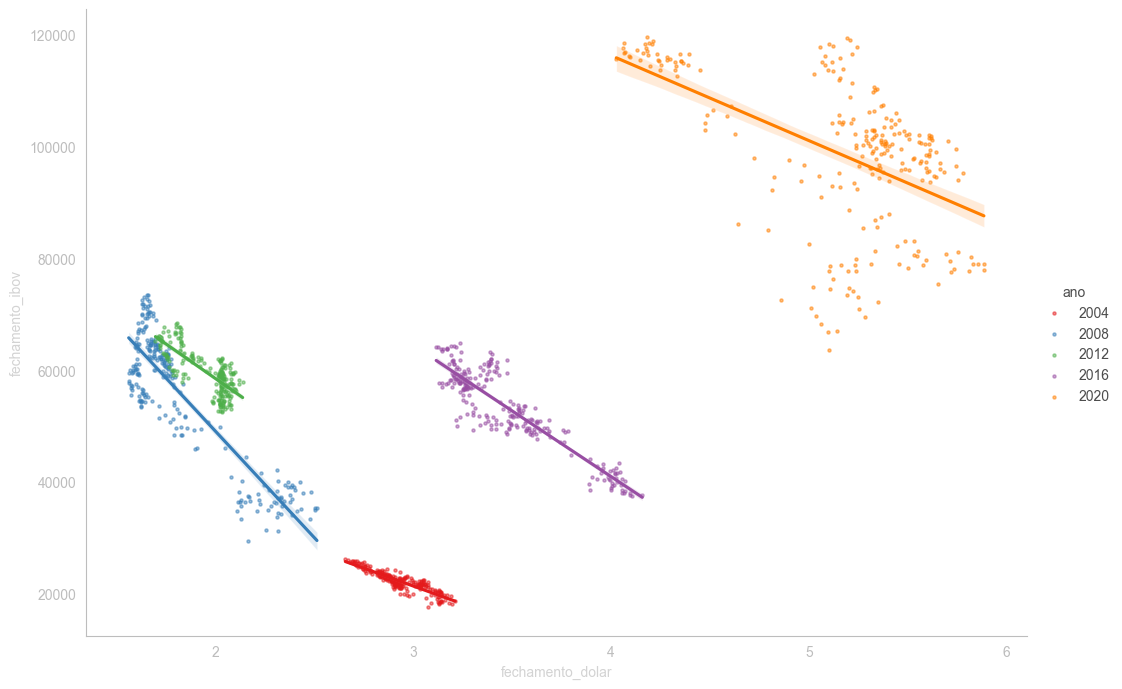

In [86]:
# fig, ax = plt.subplots(figsize=(15, 7))

# Crie o gráfico de dispersão
# ax.scatter(x=df1['fechamento_dolar'], y=df1['fechamento_ibov'], label='Dados', s = 5, alpha = 0.5)

# scatter with hue in seaborn
# sns.scatterplot(x=df1['fechamento_dolar'], y=df1['fechamento_ibov'], hue=df1['data'].dt.year, palette='viridis', ax=ax)

# Crie o gráfico de linha usando os parâmetros do modelo
# ax.plot(df1['fechamento_dolar'], results.fittedvalues, label='OLS', color='red')

# scatter with hue in seaborn
# sns.lineplot(x=df1['fechamento_dolar'], y=results.fittedvalues, hue=df1['data'].dt.year, palette='viridis', ax=ax)

# create lmplot with hue in seaborn
sns.lmplot(x='fechamento_dolar', 
           y='fechamento_ibov', 
           hue='ano', 
           data=df_reg, 
           palette='Set1', 
           height=7, 
           aspect=1.5, 
           legend=True,
           scatter_kws={"s": 5, "alpha": 0.5}
           )

# Defina os rótulos dos eixos
# ax.set_ylabel('Ibovespa')
# ax.set_xlabel('Dólar')

# # Defina o título do gráfico
# ax.set_title('Regressão linear simples entre dólar e Ibovespa')

# # Adicione uma legenda ao gráfico
# ax.legend()

plt.show()